In [1]:
#Establecer directorio
cd("$(homedir())/Documents/UNAM/Tesis_Lic")

In [2]:
using StatsBase

In [3]:
using DelimitedFiles

In [4]:
using RandomNumbers.Xorshifts

In [5]:
using LightGraphs

In [6]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [7]:
"""
    import_matrix(arch::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function import_matrix(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end

import_matrix

In [8]:
#Nombres de aeropuertos
"""
    airport_names(arch::AbstractString)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function airport_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',', String)
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end

airport_names

In [9]:
"""
    neighbours(M::Array{Int64,2})

Función que obtiene un conjunto de arreglos con los vecinos de cada nodo.
"""
function neighbours(M::Array{Int64,2})

    nodos = size(M, 1) #aeropuertos
    vecindades = []

    for i in 1:nodos
        vecinos = findall(x -> x != 0, M[i, :])
        push!(vecindades, vecinos)
    end
    vecindades
end

neighbours

In [10]:
#Grado
"""

    n_in_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

Implementación

#### Ejemplos
"""
function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_in_degree

In [11]:
"""
    in_degree(M::Array{Int64,2})

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function in_degree(M::Array{Int64,2})
    grados_entrada = sum(M, dims = 2)
end

in_degree

In [12]:
"""
    n_out_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_out_degree (generic function with 1 method)

In [13]:
"""
    out_degree(M::Array{Int64,2})

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function out_degree(M::Array{Int64,2})
    grados_salida = sum(M, dims = 1)
end

out_degree

In [14]:
#Distribución de grado
"""
Función de distribución de grado de entrada
"""
function distrib_in_degree(M::Array{Int64,2})
    x = in_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_in_degree

In [15]:
"""
Función de distribución de grado de salida
"""
function distrib_out_degree(M::Array)
    x = out_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_out_degree

In [16]:
"""
    plot_distrib(M::Array{Int64,2}, tipo::String, titulo::String, color::String)

Función con parámetros:
M = matriz
tipo = "in" o "out"
titulo = acepta el título del gráfico
color = color de las barras

que regresa un histograma de la distribución de grado, entrada o salida.
"""
function plot_distrib(M::Array{Int64,2}, tipo::String, titulo::String, color::String)

    pyplot()

    if tipo == "in"
        distribucion = distrib_in_degree(M::Array)
    elseif tipo == "out"
        distribucion = distrib_out_degree(M::Array)
    end
    distribucion

    graph = bar(distribucion, fillcolor = color, markersize = 3, linealpha = 0.5,
    title = titulo,
    xlabel = "Grado",
    ylabel = "Frecuencia",
    xlims = (-10,250), #obtener límites
    ylims = (-10,100)) #obtener límites
end

plot_distrib

In [17]:
"""

    r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)

La función r_walks tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
f, nodo inicial de tipo Int64
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz, el cual tiene igual probabilidad de avanzar
hacia cualquiera de sus vecinos.
Regresa un arreglo que contiene todas las trayectorias que tomó el caminante aleatorio.
"""
function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)

    paths = zeros(Int64, (iter, steps + 1))
    s = f
    seed = 1
    vecindades = neighbours(M)

    for i in 1:iter
        paths[i, 1] = f

        for p in 1:steps
            vecindad = vecindades[s]

            if vecindad == []
                break
            else
                a = sample(Xoroshiro128Plus(seed), vecindad)
                paths[i, p + 1] = a
                s = a
                seed += 1
            end

        end
        s = f

    end

    return paths
end

r_walks

In [18]:
"""

    random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64)

La función random_walk tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz con igual probabilidad de avanzar
hacia cualquiera de sus vecinos. Esta función recorre todos los nodos de la red como
nodos iniciales y sobre ellos itera para obtener el número de caminos que se le pidió.
Regresa un arreglo que contiene arreglos asociados a todas las trayectorias que tomó el
caminante aleatorio para cada nodo inicial de la red.
"""
function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64)

    random_walks = []
    nodos = size(M, 1)

    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end

    random_walks
end

random_walk

In [19]:
#Nodos/aeropuertos visitados
"""
    visited_vertices(W::Array{Any,1})

La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""
function visited_vertices(W::Array{Any,1})

    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos, no necesario
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []

    for i in 1:v
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end

        push!(cobert, visit)
        visit = []
    end

    return cobert
end

visited_vertices

In [20]:
#Random walks con nodos globales
"""
    walk_global(W::Array{Any,1}, airline_code::String, v::Int64)

Función que cambia las caminatas del número de nodo asociado a la aerolínea a número de nodo GLOBAL de aeropuertos.
Parámetros:
W = caminatas aleatorias (arreglo de matrices)
airline_code = código de la aerolínea
v = nodo inicial
"""
function walk_global(W::Array{Any,1}, airline_code::String, v::Int64, dicc)

    #Ahora se usa la función para obtener los nodos diferentes
    nodos_diferentes = visited_vertices(W)

    #vv2b[1][1,:] #Nodos únicos visitados en la iteración 1 con nodo inicial 1 #Leo los visited vertices del archivo
    m = size(W[1], 1) #renglones/iteraciones
    #@show m
    n = size(W[1], 2) #columnas/pasos+1/nodos
    #@show n
    l = length(W) #número de nodos iniciales
    #@show l

    #Se lee el diccionario
    archivo_dicc = dicc
    #@show archivo_dicc
    aerol_col = string(airline_code, "_num") #Nombre de la columna
    #@show aerol_col
    coord_aerol = findall(x -> x == aerol_col, archivo_dicc) #Busco las coordenadas de la columna
    #@show coord_aerol
    col_aerol = coord_aerol[1][2] #Segunda coordenada de la posición (columna)
    columna_aerol = archivo_dicc[:, col_aerol] #Obtengo la columna con el nombre del aeropuerto al que corresponde
    #@show columna_aerol
    walk_empty = zeros(Int64, m, n)#Arreglo vacío para nuevos números
        #@show walk_empty

    for k = v #1:l #nodo inicial v
        #@show k
        arreglo_visitas = nodos_diferentes[k]
        #@show arreglo_visitas
        caminatas_nodo = W[k] #caminata y sus iteraciones con el mismo nodo inicial
        #@show caminatas_nodo


        for i in 1:m #voy por las iteraciones
            #@show i
            nodos_dif = arreglo_visitas[i, :] #array/caminata única de los nodos que buscará
            #@show nodos_dif

            for j in 1:length(nodos_dif[]) #vamos por los nodos diferentes por los que pasé
                #@show j

                nodo_original = nodos_dif[][j] #index original de la aerolínea
                #@show nodo_original

                #Busco la posición original del aeropuerto que se asignará
               # if
                posicion_original = findall(x -> x == nodo_original, archivo_dicc[:, col_aerol])
                #Este arreglo tendrá la coordenada de la posición del nodo inicial, sin embargo, si llegué a un endpoint,
                #buscará la coordenada de la posición del nodo 0 y te regresará un un arreglo vacío.
                #@show posicion_original
                coords_ys = findall(x -> x == nodo_original, caminatas_nodo[i, :]) #Encuentra uno de los nodos dif en la iteración
                        #@show coords_ys

                #Se busca el nombre del aeropuerto

                for q in 1:length(coords_ys) #Se itera sobre las posiciones en las caminatas
                        #@show length(coords_ys)
                        #@show q

                        pos_actual = coords_ys[q]

                        if isempty(posicion_original) == false

                            numero_asignado = archivo_dicc[posicion_original, 3]

                            walk_empty[i, pos_actual] = numero_asignado[] #asigno valor de diccionario al arreglo vacío i, pos_actual

                        else break
                    end

                end

            end

        end

    end

    return walk_empty

end

walk_global

In [21]:
#Random walks con nombres
"""
    walk_names(W::Array{Any,1}, airline_code::String, v::Int64)

Función que cambia las caminatas del número de nodo asociado a la aerolínea a nombres de aeropuertos.
Parámetros:
W = caminatas aleatorias (arreglo de matrices)
airline_code = código de la aerolínea
v = nodo inicial
"""
function walk_names(W::Array{Any,1}, airline_code::String, v::Int64, dicc)

    #Ahora se usa la función para obtener los nodos diferentes
    nodos_diferentes = visited_vertices(W)
    m = size(W[1], 1) #renglones
    n = size(W[1], 2) #columnas
    l = length(W) #número de nodos iniciales
    #ep = ["Endpoint"]

    #Se lee el diccionario
    #archivo_dicc = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/diccionarios/dictionary_final.csv", ',')
    archivo_dicc = dicc

    aerol_col = string(airline_code, "_num") #Nombre de la columna
    coord_aerol = findall(x -> x == aerol_col, archivo_dicc) #Busco las coordenadas de la columna
    col_aerol = coord_aerol[1][2] #Segunda coordenada de la posición (columna)
    columna_aerol = archivo_dicc[:, col_aerol] #Obtengo la columna con el nombre del aeropuerto al que corresponde
    walk_nothing = Array{Any}(undef, m, n)#Array{Union{Nothing, String}}(nothing, m, n) #archivo vacío de una matriz para un nodo inicial
    #@show walk_nothing

    for k = v #nodo inicial v
        arreglo_visitas = nodos_diferentes[k]
        caminatas_nodo = W[k]

        for i in 1:m #voy por las iteraciones
            nodos_dif = arreglo_visitas[i, :] #array/caminata única de los nodos que buscará

            for j in 1:length(nodos_dif[]) #para cada uno de los nodos diferentes visitados
                nodo_original = nodos_dif[][j] #tomo el nodo original visitado

                #Busco la posición original del aeropuerto visitado en la columna de la aerolínea
                posicion_original = findall(x -> x == nodo_original, archivo_dicc[:, col_aerol])

                #Ahora busco dónde se colocará el nombre en las posiciones correctas del arreglo vacío
                #Busco el primer nodo diferente en la iteración i
                #Encuentra todas las coordenadas de los nodos dif en la iteración original
                coords_ys = findall(x -> x == nodo_original, caminatas_nodo[i, :])


                for q in 1:length(coords_ys) #Se itera sobre las posiciones en las caminatas

                    pos_actual = coords_ys[q]

                    if isempty(posicion_original) == false

                        #Se busca el nombre del aeropuerto
                        nombre_asignado = archivo_dicc[posicion_original, 2] #y=2 porque esa es la columna de los nombres

                        walk_nothing[i, pos_actual] = nombre_asignado[] #asigno valor de diccionario al arreglo vacío i, pos_actual

                        else walk_nothing[i, pos_actual] = " " #break
                    end
                end

            end

        end

    end
    return walk_nothing
end

walk_names

In [22]:
"""
    walk_length(W::Array{Any,1})

La función walk_length tiene como parámetros:
RW, arreglo de arreglos de tipo Array{Any,1} que corresponde al arreglo de caminatas aleatorias.
La función regresa un arreglo de arreglos que contiene las longitudes de todas las trayectorias que tomó el
caminante aleatorio para cada nodo inicial de la red.
"""
function walk_length(W::Array{Any,1})

    longitudes = Array[]

    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #Es el número de iteraciones
    longitud = zeros(Int64, s)

    for i in 1:v

        for j in 1:s

            longitud[j] = findlast(x -> x != 0, W[i][j, :])

        end
         push!(longitudes, longitud)

        longitud = zeros(Int64, s)
    end
    return longitudes

end

walk_length

In [23]:
"""
    walk_av_length(W::Array{Any,1})

La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la
función walk_length).
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""
function walk_av_length(W::Array{Any,1}) #Llamar a función

    proms = Array{Float64}(undef, 0)
    wlength = walk_length(W)

    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    proms
end

walk_av_length

In [24]:
"""
    plot_av_length_vertex(W::Array{Float64, 1}, airline_code::String)

Función que grafica (scatter plot) del promedio por nodo inicial de caminatas
"""
function plot_av_length_vertex(W::Array{Any,1}, airline_code::String)



    info = walk_av_length(W)
    aerolinea_matriz = string(airline_code, "_matriz_du.csv")
    nombres_multiplex = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/$aerolinea_matriz")

    scatter(info,
        color = "#0f87bf",
        alpha = 0.8,
        title = string("Longitud promedio por nodo de ", airline_code),
        xticks = (1:1:length(W), nombres_multiplex), #data_names_multiplex),
        xlabel = "Aeropuerto inicial",
        ylabel = "Longitud",
        legendtitle = airline_code,
        label = "Promedio",
        xrotation = 50,
        ylims = (0, 2500))
end

plot_av_length_vertex

In [25]:
#Frecuencia de visitas
"""
    freq_vertices_visits(W::Array{Any,1})

Función que hace un diccionario con frecuencias de visitas
"""
function freq_vertices_visits(W::Array{Any,1})

    dicc = [] #arreglo vacío

    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0

    for i in 1:nodos #corro por todos los nodos
        for j in 1:iter #corro por las iteraciones
            diccionario = countmap(W[i][j, :]) #hago diccionario de freqs de cada caminata
            push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío
        end

        diccionario = 0
    end

    return dicc
end

freq_vertices_visits

In [26]:
"""
    distrib_vertices_visits(W::Array{Any,1})

Función que crea un arreglo de arreglos con la distribución de frecuencia de visitas
"""
function distrib_vertices_visits(W::Array{Any,1})

    x = freq_vertices_visits(W) #diccionario de frecuencias
    l = length(W)
    f = 0
    frec_total = Array[] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, l+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:l+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i
            f += 1
        end
        push!(frec_total, frec_nodo)

        f = 0
        frec_nodo = zeros(Int64, l+1)

    end

    return frec_total
end

distrib_vertices_visits

In [27]:
"""
    freq_vertex_visits(W::Array{Any,1}, n::Int64)

Función que hace un diccionario con frecuencias para un nodo inicial
"""
function freq_vertex_visits(W::Array{Any,1}, n::Int64) #puede ser más eficiente llamando la función anterior sin nodo

    dicc = [] #arreglo vacío

    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0

    for j in 1:iter #corro por las iteraciones

        diccionario = countmap(W[n][j, :]) #hago diccionario de freqs de cada caminata

        push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío

    end

    return dicc
end

freq_vertex_visits

In [28]:
"""
    distrib_vertex_visits(W::Array{Any,1}, n::Int64)

Función que crea un arreglo de arreglos con la distribución de frecuencias de visitas de un nodo inicial
"""
function distrib_vertex_visits(W::Array{Any,1}, n::Int64)

    x = freq_vertex_visits(W, n) #diccionario de frecuencias
    nodos = length(W)
    f = 0
    frec_total = [] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, nodos+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:nodos+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i

            f += 1
        end
        push!(frec_total, frec_nodo)

        f = 0
        frec_nodo = zeros(Int64, nodos+1)

    end

    return frec_total
end

distrib_vertex_visits

In [29]:
"""
    distrib_av_visits(W::Array{Any, 1})

Función que hace una distribución de visitas por nodo inicial y muestra todos los nodos iniciales
"""
function distrib_av_visits(W::Array{Any, 1}) 
    
    nodos = length(W) #número de nodos
    iteracion = size(W[1],1)
    dicc = zeros(Float64, nodos, nodos+1) #matriz de ceros (nodos x nodos+1)
    
    for i in 1:nodos #(1 a 17)
        prom_conteos = counts(W[i], 0:nodos)/iteracion #hago diccionario con prom de freqs de cada nodo inicial
        
        dicc[i, :] = prom_conteos 
    end

    dicc
end

distrib_av_visits

In [30]:
"""
    plot_freq_av_visits(W::Array{Any, 1})

Función que crea un diccionario con frecuencias por nodo inicial y muestra todos
"""
function plot_freq_av_visits(W::Array{Any, 1}, airline_code::String)

  

    mat_completa = distrib_av_visits(W)
    mat = mat_completa[:, (2:end)] #desde la segunda columna para no tomar en cuenta los end-points

    aerolinea_matriz = string(airline_code, "_matriz_du.csv")
    nombres_multiplex = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/$aerolinea_matriz")

    xs = [nombres_multiplex]
    ys = [nombres_multiplex] #[string("v_0 ", i) for i = 1:length(W)]
    z = mat

    heatmap(xs, ys, z,
        title = string("Frecuencia de visitas para ", airline_code),
        #aspect_ratio = 1,
        clims = (0, maximum(mat)), #MÁXIMO DEL MULTIPLEX GLOBAL/AEROLÍNEA MÁS GRANDE ¿?
        xticks = :all,
        yticks = :all,
        xtickfont = font(7), #"Arial"),
        ytickfont = font(7), #"Courier"),
        ylabel = "Visitas promedio",
        xlabel = "Aeropuerto inicial",
        xrotation = 50)
end

plot_freq_av_visits

In [31]:
"""
    coverage(W::Array{Any,1})

La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""
function coverage(W::Array{Any,1}) 
    
    cobert = []
    
    v = length(W) #tamaño de la matriz, número de nodos
    x = visited_vertices(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            l = length(x[i][j])
            longz[j] = l
        end
        
        push!(cobert, longz)
        longz = zeros(Int64, s)
    end
    
    return cobert
end

coverage

In [32]:
"""
    vertex_coverage(W::Array{Any,1})

Da el promedio de cobertura la caminata por nodo inicial. 
"""
function vertex_coverage(W::Array{Any,1}) #Esta es la importante
    
    longitud = Array{Float64}(undef, 0)
    x = coverage(W)
    
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end
    
    longitud
end

vertex_coverage

In [33]:
"""
    plot_vertex_coverage(W::Array{Any, 1}, airline_code::String)

Función que grafica (scatter plot) del promedio por nodo inicial de caminatas
"""
function plot_vertex_coverage(W::Array{Any, 1}, airline_code::String)

    info = vertex_coverage(W)

    aerolinea_matriz = string(airline_code, "_matriz_du.csv")
    nombres_multiplex = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/$aerolinea_matriz")


    scatter(info,
        color = "#0f87bf",
        alpha = 0.4,
        title = string("Cobertura por nodo inicial ", airline_code),
        xlabel = "Aeropuerto inicial",
        ylabel = "Longitud",
        xticks = (1:1:length(W), nombres_multiplex),
        yticks =:all,
        legendtitle = airline_code,
        label = "Promedio",
        xrotation = 50,
        #xlims = (-10,300)) #obtener límites
        ylims = (0, 50))

end


plot_vertex_coverage

In [34]:
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas.csv", ',', String)
lista_aerolineas = info_aerolineas[:, 2]

568-element Array{String,1}:
 "Airlines"
 "US"      
 "AA"      
 "TK"      
 "DL"      
 "MU"      
 "CZ"      
 "UA"      
 "FR"      
 "BA"      
 "AF"      
 "LH"      
 "CA"      
 ⋮         
 "GY"      
 "EW"      
 "D6"      
 "9D"      
 "7E"      
 "6Y"      
 "6I"      
 "5M"      
 "5G"      
 "4K"      
 "4D"      
 "4B"      

In [35]:
archivo_dicc = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/diccionarios/dictionary_final.csv", ',')

3190×570 Array{Any,2}:
     "line"  "global_airports"  …  "ZK_num"  "ZL_num"   "ZM_num"
    1        "AER"                 "NA"      "NA"       "NA"    
    2        "ASF"                 "NA"      "NA"       "NA"    
    3        "CEK"                 "NA"      "NA"       "NA"    
    4        "DME"                 "NA"      "NA"      1        
    5        "EGO"              …  "NA"      "NA"       "NA"    
    6        "GYD"                 "NA"      "NA"       "NA"    
    7        "KGD"                 "NA"      "NA"       "NA"    
    8        "KZN"                 "NA"      "NA"       "NA"    
    9        "LED"                 "NA"      "NA"       "NA"    
   10        "MRV"              …  "NA"      "NA"       "NA"    
   11        "NBC"                 "NA"      "NA"       "NA"    
   12        "NJC"                 "NA"      "NA"       "NA"    
    ⋮                           ⋱                               
 3178        "LPS"                 "NA"      "NA"       "NA"    
 3

In [36]:
archivo_dicc[:,3]

3190-element Array{Any,1}:
     "global_num"
    1            
    2            
    3            
    4            
    5            
    6            
    7            
    8            
    9            
   10            
   11            
   12            
    ⋮            
 3178            
 3179            
 3180            
 3181            
 3182            
 3183            
 3184            
 3185            
 3186            
 3187            
 3188            
 3189            

In [37]:
#Debería ser la nueva lista ya en el script
lista_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/lista_aerolineas.csv", ',', String)
i = 98
airline_code = lista_aerolineas[i]

"AA"

In [38]:
lista_aerolineas

568×2 Array{String,2}:
 ""    "Airline"
 "2B"  "2B"     
 "2G"  "2G"     
 "2I"  "2I"     
 "2J"  "2J"     
 "2K"  "2K"     
 "2L"  "2L"     
 "2N"  "2N"     
 "2O"  "2O"     
 "2P"  "2P"     
 "2Z"  "2Z"     
 "3E"  "3E"     
 "3F"  "3F"     
 ⋮              
 "Z3"  "Z3"     
 "Z4"  "Z4"     
 "Z8"  "Z8"     
 "Z9"  "Z9"     
 "ZB"  "ZB"     
 "ZD"  "ZD"     
 "ZE"  "ZE"     
 "ZH"  "ZH"     
 "ZI"  "ZI"     
 "ZK"  "ZK"     
 "ZL"  "ZL"     
 "ZM"  "ZM"     

In [39]:
aerolinea_matriz = string(airline_code, "_matriz_du.csv")
multiplex = import_matrix("data/aerolineas_matrices/$aerolinea_matriz")

259×259 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

In [40]:
data_names_multiplex = airport_names("data/aerolineas_matrices/$aerolinea_matriz")

259-element Array{String,1}:
 "ABE"
 "ABQ"
 "AGS"
 "ALB"
 "AMS"
 "ANC"
 "ANU"
 "ASU"
 "ATH"
 "ATL"
 "AUA"
 "AUS"
 "AVL"
 ⋮    
 "YYC"
 "YYZ"
 "ZIH"
 "ZRH"
 "CRW"
 "LEX"
 "MOB"
 "PWM"
 "TYS"
 "VPS"
 "LCY"
 "MEL"

In [41]:
in_degree_multiplex = @time in_degree(multiplex)

  0.733917 seconds (393.94 k allocations: 19.783 MiB, 3.74% gc time)


259×1 Array{Int64,2}:
 1
 1
 1
 2
 1
 1
 3
 1
 1
 2
 3
 8
 1
 ⋮
 7
 5
 1
 2
 0
 0
 0
 0
 0
 0
 0
 0

In [42]:
distrib_in_degree_multiplex = @time distrib_in_degree(multiplex)

  0.287839 seconds (90.12 k allocations: 4.334 MiB, 12.79% gc time)


113-element Array{Int64,1}:
   8
 113
  46
  25
  17
  13
   9
   6
   5
   1
   1
   2
   0
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   2

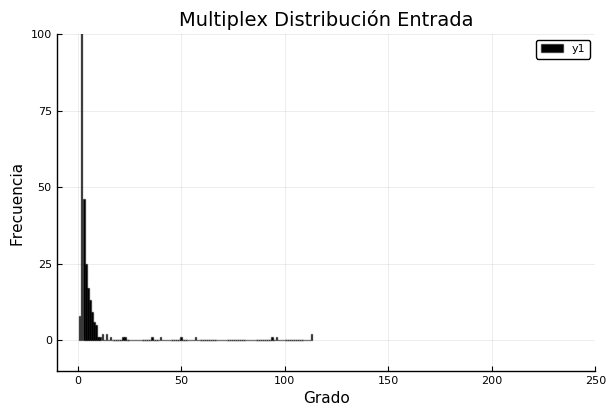

 85.780613 seconds (38.57 M allocations: 1.881 GiB, 6.01% gc time)


In [43]:
plot_in_degree_multiplex = @time plot_distrib(multiplex, "in", "Multiplex Distribución Entrada", "black")
archivo_hist_grado_entrada = string(airline_code, "_hist_in_degree.pdf")
	savefig(plot_in_degree_multiplex, "/Users/yuriko/Desktop/$archivo_hist_grado_entrada") #savefig(plot,file.png)

In [44]:
archivo_hist_grado_entrada = string(airline_code, "_hist_in_degree.png")
	savefig(plot_in_degree_multiplex, "/Users/yuriko/Desktop/$archivo_hist_grado_entrada") #savefig(plot,file.png)

In [45]:
vecinos_M = @time neighbours(multiplex)

  1.320519 seconds (207.27 k allocations: 10.502 MiB, 11.65% gc time)


259-element Array{Any,1}:
 [176]                                  
 [58]                                   
 [43]                                   
 [43, 176]                              
 [176]                                  
 [177]                                  
 [43, 113, 147]                         
 [147]                                  
 [176]                                  
 [58, 147]                              
 [43, 147, 176]                         
 [58, 113, 120, 125, 151, 167, 176, 177]
 [43]                                   
 ⋮                                      
 [58, 113, 119, 120, 167, 177, 201]     
 [58, 119, 120, 139, 147]               
 [177]                                  
 [113, 176]                             
 Int64[]                                
 Int64[]                                
 Int64[]                                
 Int64[]                                
 Int64[]                                
 Int64[]                       

In [46]:
random_walk_multiplex = @time random_walk(multiplex, 2500, 100)

 21.926495 seconds (8.97 M allocations: 1.088 GiB, 25.61% gc time)


259-element Array{Any,1}:
 [1 176 … 0 0; 1 176 … 0 0; … ; 1 176 … 0 0; 1 176 … 0 0]        
 [2 58 … 0 0; 2 58 … 0 0; … ; 2 58 … 0 0; 2 58 … 0 0]            
 [3 43 … 0 0; 3 43 … 0 0; … ; 3 43 … 0 0; 3 43 … 0 0]            
 [4 176 … 0 0; 4 43 … 0 0; … ; 4 176 … 0 0; 4 43 … 0 0]          
 [5 176 … 0 0; 5 176 … 0 0; … ; 5 176 … 0 0; 5 176 … 0 0]        
 [6 177 … 0 0; 6 177 … 0 0; … ; 6 177 … 0 0; 6 177 … 0 0]        
 [7 147 … 0 0; 7 147 … 0 0; … ; 7 147 … 0 0; 7 43 … 0 0]         
 [8 147 … 0 0; 8 147 … 0 0; … ; 8 147 … 0 0; 8 147 … 0 0]        
 [9 176 … 0 0; 9 176 … 0 0; … ; 9 176 … 0 0; 9 176 … 0 0]        
 [10 147 … 0 0; 10 147 … 0 0; … ; 10 147 … 0 0; 10 58 … 0 0]     
 [11 176 … 0 0; 11 176 … 0 0; … ; 11 176 … 0 0; 11 43 … 0 0]     
 [12 113 … 0 0; 12 151 … 0 0; … ; 12 125 … 0 0; 12 177 … 0 0]    
 [13 43 … 0 0; 13 43 … 0 0; … ; 13 43 … 0 0; 13 43 … 0 0]        
 ⋮                                                               
 [248 177 … 0 0; 248 58 … 0 0; … ; 248 201 … 0 0; 

In [47]:
random_walk_multiplex[1]

100×2501 Array{Int64,2}:
 1  176   30  176   62   43  201  176  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  176  210  176  255    0    0    0     0  0  0  0  0  0  0  0  0  0  0  0
 1  176   17  147   90  147  102   59     0  0  0  0  0  0  0  0  0  0  0  0
 1  176  196  176  103  147  103  177     0  0  0  0  0  0  0  0  0  0  0  0
 1  176  210   43  156   43   41   58     0  0  0  0  0  0  0  0  0  0  0  0
 1  176  225  147   36  113  160   92  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  176   39  176   68  176  110  176     0  0  0  0  0  0  0  0  0  0  0  0
 1  176   37  167   63  176  110  176     0  0  0  0  0  0  0  0  0  0  0  0
 1  176   12  176   43  107   43  224     0  0  0  0  0  0  0  0  0  0  0  0
 1  176   63  167   76  177  119   43     0  0  0  0  0  0  0  0  0  0  0  0
 1  176  192   58   81   58  186   58  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  176  175  176   68  176  232  176     0  0  0  0  0  0  0  0  0  0  0  0
 1  176  133  147   87   58   23  176     0  0  0  

In [48]:
walk_length_multiplex = @time walk_length(random_walk_multiplex)

 10.349077 seconds (380.28 k allocations: 510.699 MiB, 20.86% gc time)


259-element Array{Array,1}:
 [11, 5, 339, 301, 17, 666, 142, 87, 90, 54  …  238, 5, 17, 3, 11, 5, 135, 159, 591, 34]          
 [11, 30, 314, 301, 682, 142, 87, 90, 54, 585  …  591, 34, 182, 303, 9, 61, 20, 60, 161, 1015]    
 [11, 30, 314, 3, 299, 682, 142, 87, 90, 638  …  45, 54, 92, 156, 24, 114, 17, 93, 238, 5]        
 [11, 30, 15, 28, 273, 301, 682, 142, 87, 90  …  24, 114, 17, 93, 238, 5, 17, 3, 11, 5]           
 [11, 5, 339, 301, 17, 666, 142, 87, 90, 54  …  238, 5, 17, 3, 11, 5, 135, 159, 591, 34]          
 [11, 343, 301, 17, 666, 142, 87, 8, 83, 638  …  159, 591, 215, 303, 9, 61, 18, 62, 161, 1015]    
 [40, 314, 301, 682, 142, 87, 90, 638, 288, 56  …  17, 13, 139, 51, 109, 591, 34, 182, 303, 9]    
 [40, 314, 301, 682, 142, 87, 90, 638, 288, 56  …  51, 109, 591, 34, 182, 303, 69, 18, 62, 161]   
 [11, 5, 339, 301, 17, 666, 142, 87, 90, 54  …  238, 5, 17, 3, 11, 5, 135, 159, 591, 34]          
 [40, 314, 301, 682, 142, 87, 90, 54, 585, 288  …  171, 159, 591, 34, 182, 303, 9

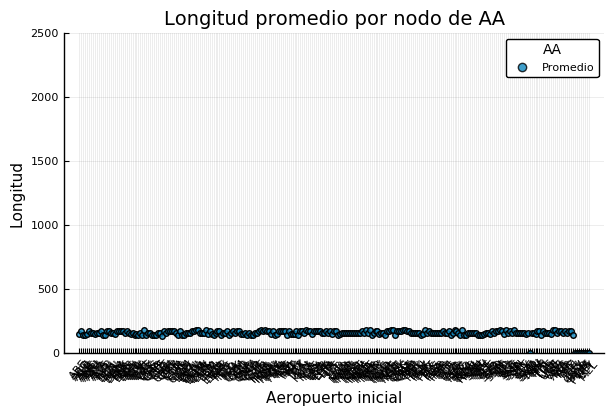

 10.933983 seconds (1.41 M allocations: 560.497 MiB, 26.98% gc time)


In [49]:
plot_walk_av_length_multiplex = @time plot_av_length_vertex(random_walk_multiplex, airline_code)
archivo_long_nodo = string(airline_code, "_walk_av_length.pdf")
	savefig(plot_walk_av_length_multiplex, "/Users/yuriko/Desktop/$archivo_long_nodo") #savefig(plot,file.png)


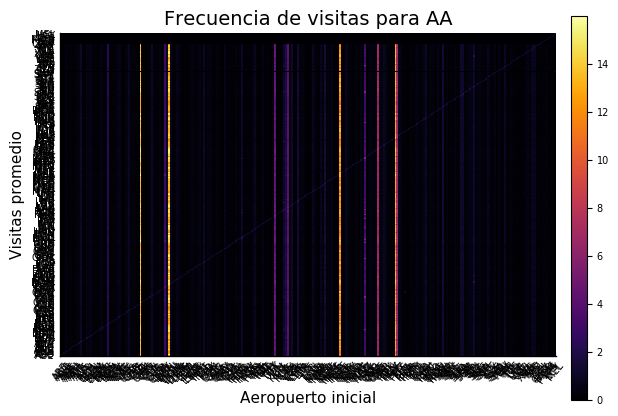

  7.328886 seconds (3.82 M allocations: 191.734 MiB, 3.42% gc time)


In [50]:
plot_freq_av_visits_multiplex = @time plot_freq_av_visits(random_walk_multiplex, airline_code)
	#Guardo el gráfico
	archivo_frecuencia_visitas = string(airline_code, "_heatmap_av_visits.pdf")
	savefig(plot_freq_av_visits_multiplex, "/Users/yuriko/Desktop/$archivo_frecuencia_visitas") #savefig(plot,file.png)


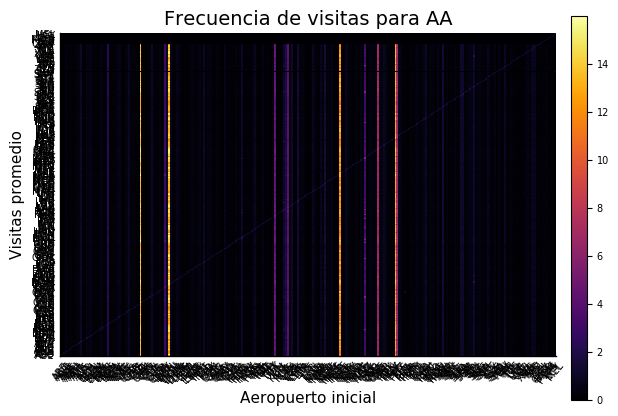

  0.704300 seconds (211.69 k allocations: 10.429 MiB)


In [51]:
plot_freq_av_visits_multiplex = @time plot_freq_av_visits(random_walk_multiplex, airline_code)
	#Guardo el gráfico
	archivo_frecuencia_visitas = string(airline_code, "_heatmap_av_visits.png")
	savefig(plot_freq_av_visits_multiplex, "/Users/yuriko/Desktop/$archivo_frecuencia_visitas") #savefig(plot,file.png)



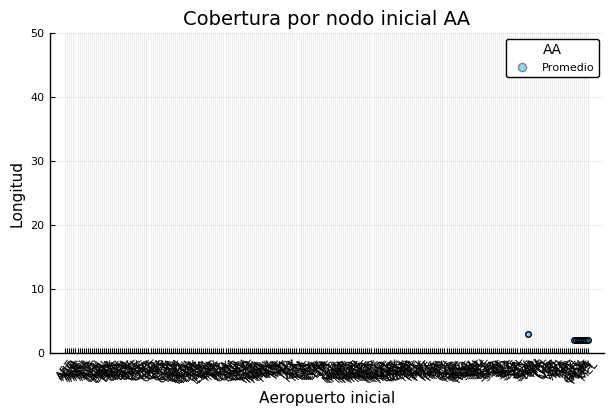

  4.296924 seconds (1.04 M allocations: 633.423 MiB, 6.57% gc time)


In [52]:
plot_vertex_coverage_multiplex = @time plot_vertex_coverage(random_walk_multiplex, airline_code)
	#Guardo los grados de salida
	archivo_plot_cobertura_nodo = string(airline_code, "_plot_vertex_coverage.pdf")
	savefig(plot_vertex_coverage_multiplex, "/Users/yuriko/Desktop/$archivo_plot_cobertura_nodo") #writedlm(f,A,delim=`\t') Escribe A en f usando delim
	

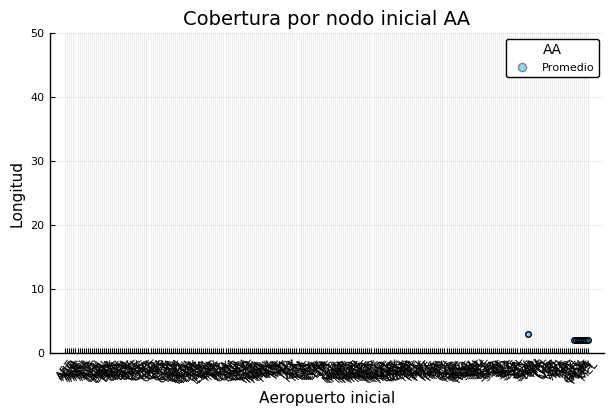

  2.883147 seconds (702.83 k allocations: 616.429 MiB, 7.34% gc time)


In [53]:
plot_vertex_coverage_multiplex = @time plot_vertex_coverage(random_walk_multiplex, airline_code)
	#Guardo los grados de salida
	archivo_plot_cobertura_nodo = string(airline_code, "_plot_vertex_coverage.png")
	savefig(plot_vertex_coverage_multiplex, "/Users/yuriko/Desktop/$archivo_plot_cobertura_nodo") #writedlm(f,A,delim=`\t') Escribe A en f usando delim
	